In [1]:
from time import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.manifold import Isomap

from parallel_transport_unfolding.ptu import PTU
from utils import align, relative_error, data_abs_path, plot_S, plot_swiss, plot_torus, plot_petals

In [2]:
%matplotlib notebook
mpl.rcParams['savefig.dpi'] = 30
mpl.rcParams['figure.dpi'] = 30

In [ ]:
# Note: for some reason prints do not work nicely with logging.info in jupyter.
# Some printouts are out of order. However, .py examples work as intended.

# Irregular S: 2D letter S shaped manifold embedded in 3D

[2020-08-09 10:35:45,649] INFO: ptu - Constructing proximity graph on 2000 points in 3D
[2020-08-09 10:35:45,697] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:35:45,698] INFO: ptu - Computing pairwise parallel transport distances


Input pointset shape:  (2000, 3)


[2020-08-09 10:35:48,671] INFO: ptu - Computing pairwise parallel transport distances: done
[2020-08-09 10:35:48,678] INFO: ptu - Performing MultiDimensional Scaling on 2000x2000 matrix
[2020-08-09 10:35:48,798] INFO: ptu - Performing MultiDimensional Scaling: done


ptu time:  3.16
isomap time:  1.59
ptu relative error: 1.4043518953574736%
isomap relative error: 5.14756874857967%


<IPython.core.display.Javascript object>


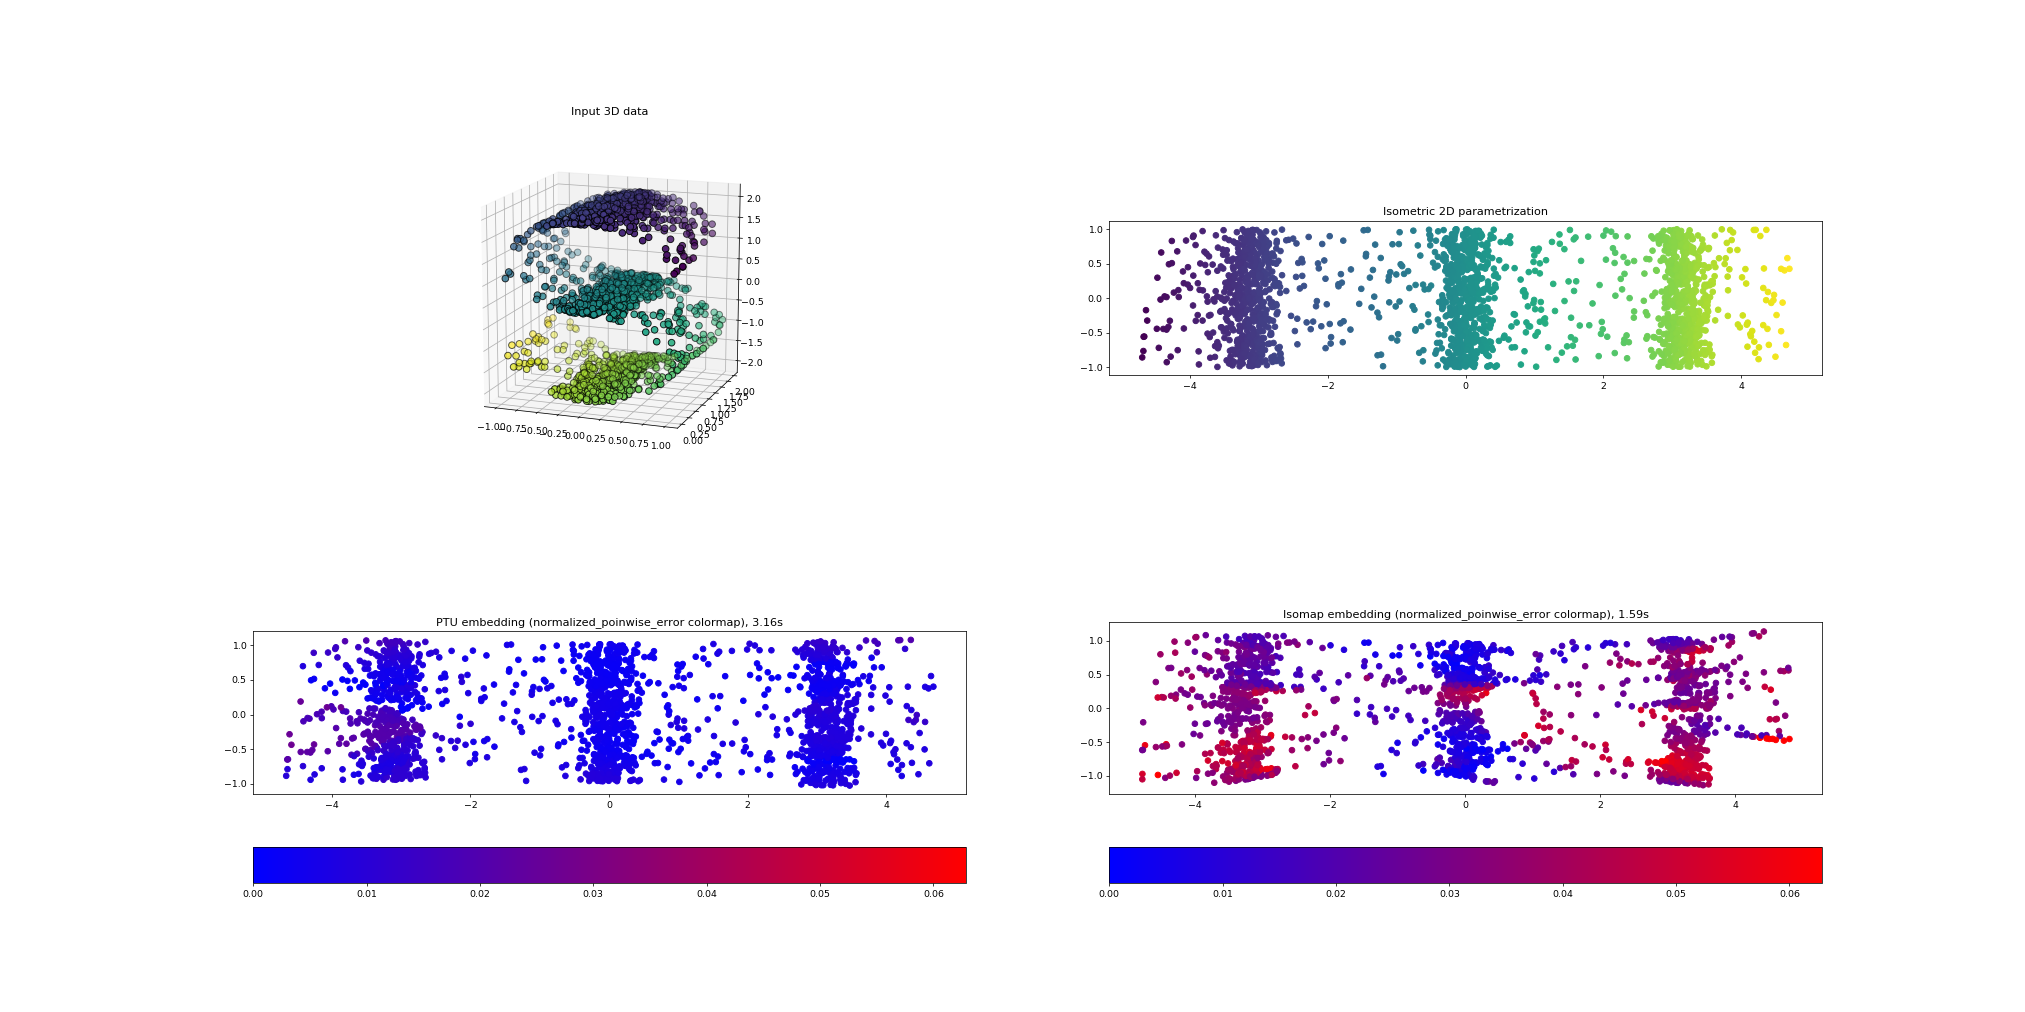

In [3]:
# Input manifold embedded in 3D, and exact 2D parametrization
with open(data_abs_path('./data/irregularS/irregularS.npy'), 'rb') as f:
    X = np.load(f)

with open(
    data_abs_path('./data/irregularS/irregularS_exact_parametrization.npy'),
    'rb'
) as f:
    exact = np.load(f)
print('Input pointset shape: ', X.shape)

# Perform PTU
t = time()
ptu = PTU(
    X=X,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
).fit()
ptu_time = round(time()-t, 2)
print('ptu time: ', ptu_time)

# Perform Isomap
t = time()
iso = Isomap(n_neighbors=10, n_components=2).fit_transform(X)
isomap_time = round(time()-t, 2)
print('isomap time: ', isomap_time)

# Align PTU and Isomap to exact parametrization via best isometric
# transformation, and compute errors
ptu = align(ptu, exact)
iso = align(iso, exact)
ptu_error = relative_error(ptu, exact)
iso_error = relative_error(iso, exact)
print('ptu relative error: {}%'.format(ptu_error))
print('isomap relative error: {}%'.format(iso_error))

# Plot results
f = plot_S(X, exact, ptu, iso, ptu_time, isomap_time,
           hue='normalized_poinwise_error')
plt.show()

# Holey S: 2D letter S shaped manifold embedded in 3D

[2020-08-09 10:35:50,544] INFO: ptu - Constructing proximity graph on 1825 points in 3D
[2020-08-09 10:35:50,558] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:35:50,559] INFO: ptu - Computing pairwise parallel transport distances


Input pointset shape:  (1825, 3)


[2020-08-09 10:35:52,895] INFO: ptu - Computing pairwise parallel transport distances: done
[2020-08-09 10:35:52,899] INFO: ptu - Performing MultiDimensional Scaling on 1825x1825 matrix
[2020-08-09 10:35:53,001] INFO: ptu - Performing MultiDimensional Scaling: done


ptu time:  2.47
isomap time:  1.3
ptu relative error: 0.5743622815296926%
isomap relative error: 8.69458751519326%


<IPython.core.display.Javascript object>


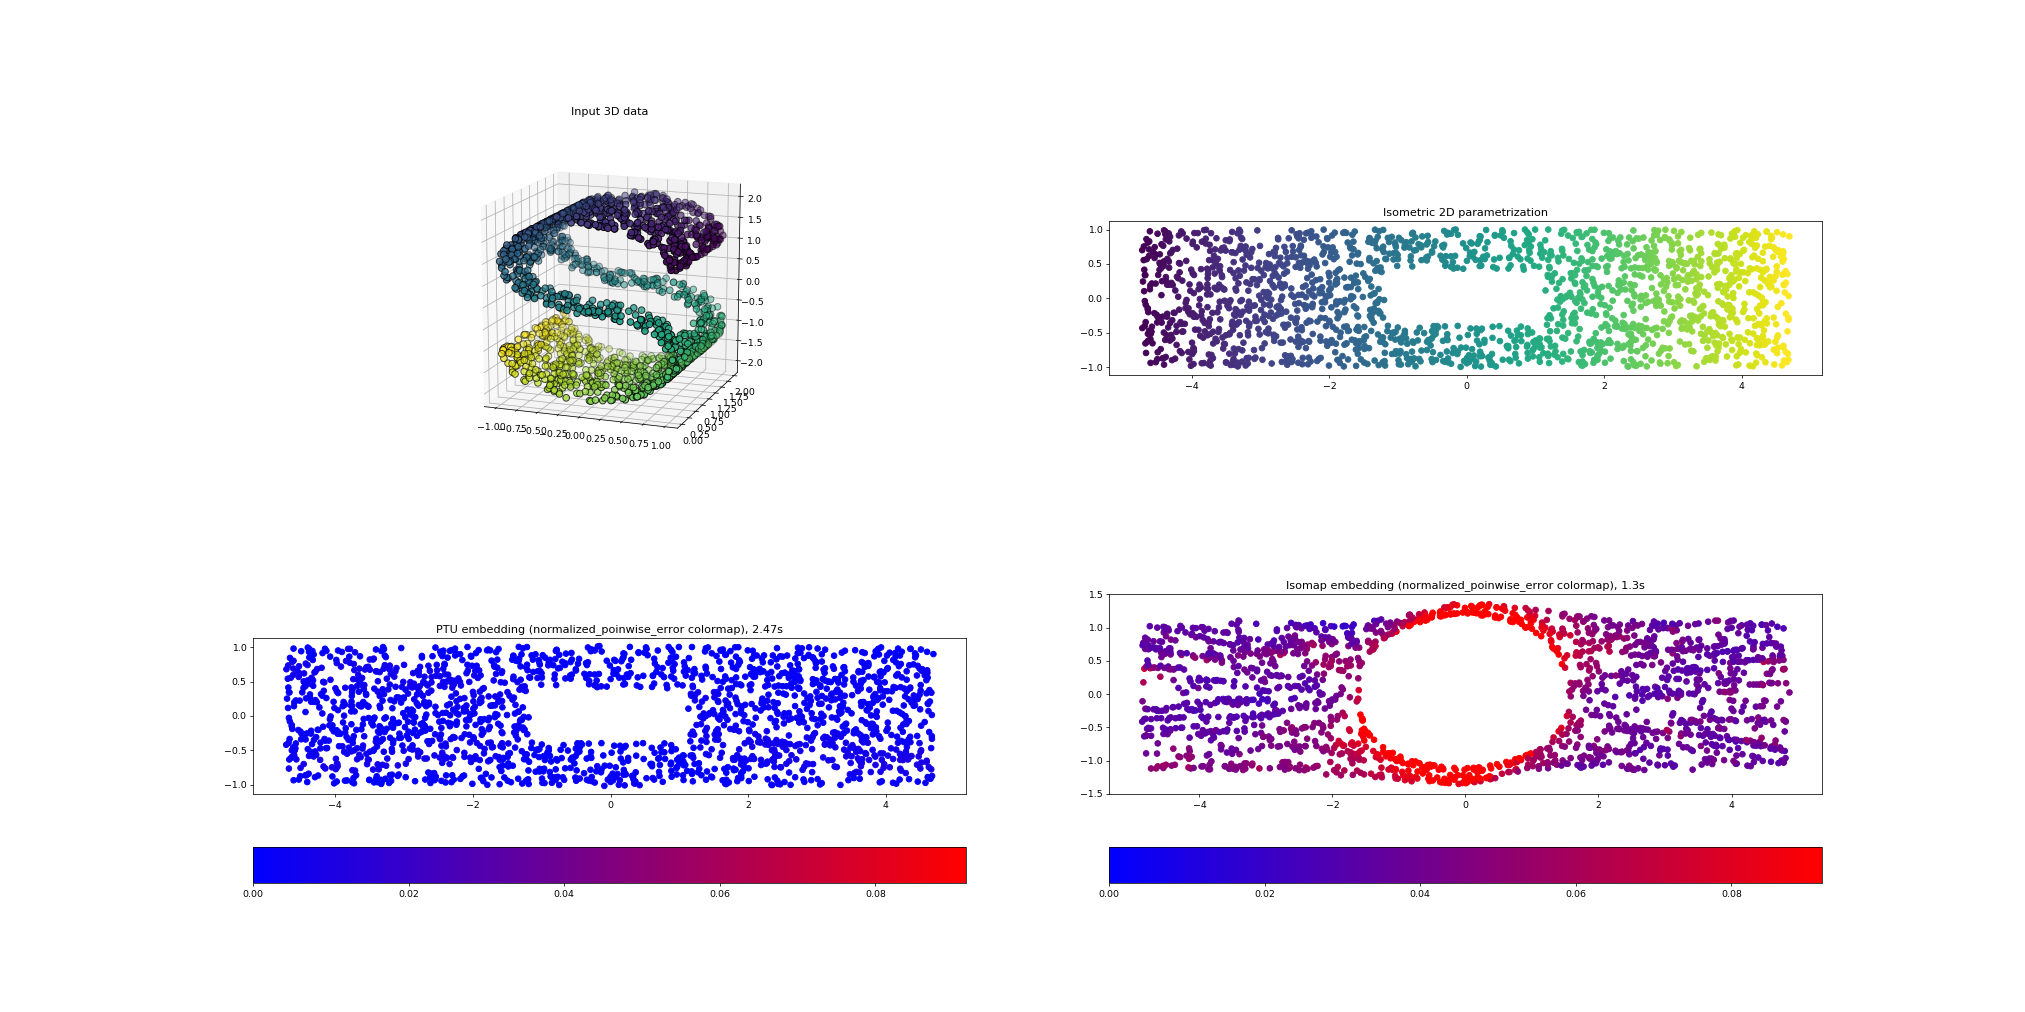

In [4]:
# Input manifold embedded in 3D, and exact 2D parametrization
with open(data_abs_path('./data/holeyS/holeyS.npy'), 'rb') as f:
    X = np.load(f)
with open(
        data_abs_path('./data/holeyS/holeyS_exact_parametrization.npy'),
        'rb') as f:
    exact = np.load(f)
print('Input pointset shape: ', X.shape)

# Perform PTU
t = time()
ptu = PTU(
    X=X,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
).fit()
ptu_time = round(time()-t, 2)
print('ptu time: ', ptu_time)

# Perform Isomap
t = time()
iso = Isomap(n_neighbors=10, n_components=2).fit_transform(X)
isomap_time = round(time()-t, 2)
print('isomap time: ', isomap_time)

# Align PTU and Isomap to exact parametrization via best isometric
# transformation, and compute errors
ptu = align(ptu, exact)
iso = align(iso, exact)
ptu_error = relative_error(ptu, exact)
iso_error = relative_error(iso, exact)
print('ptu relative error: {}%'.format(ptu_error))
print('isomap relative error: {}%'.format(iso_error))

# Plot results
f = plot_S(X, exact, ptu, iso, ptu_time, isomap_time,
           hue='normalized_poinwise_error')
plt.show()

# Noisy Swiss Roll: 2D swiss roll shaped manifold embedded in 3D

[2020-08-09 10:35:54,472] INFO: ptu - Constructing proximity graph on 2000 points in 3D
[2020-08-09 10:35:54,487] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:35:54,488] INFO: ptu - Computing pairwise parallel transport distances


Input pointset shape:  (2000, 3)


[2020-08-09 10:35:57,544] INFO: ptu - Computing pairwise parallel transport distances: done
[2020-08-09 10:35:57,549] INFO: ptu - Performing MultiDimensional Scaling on 2000x2000 matrix
[2020-08-09 10:35:57,669] INFO: ptu - Performing MultiDimensional Scaling: done


ptu time:  3.21
isomap time:  1.63


<IPython.core.display.Javascript object>


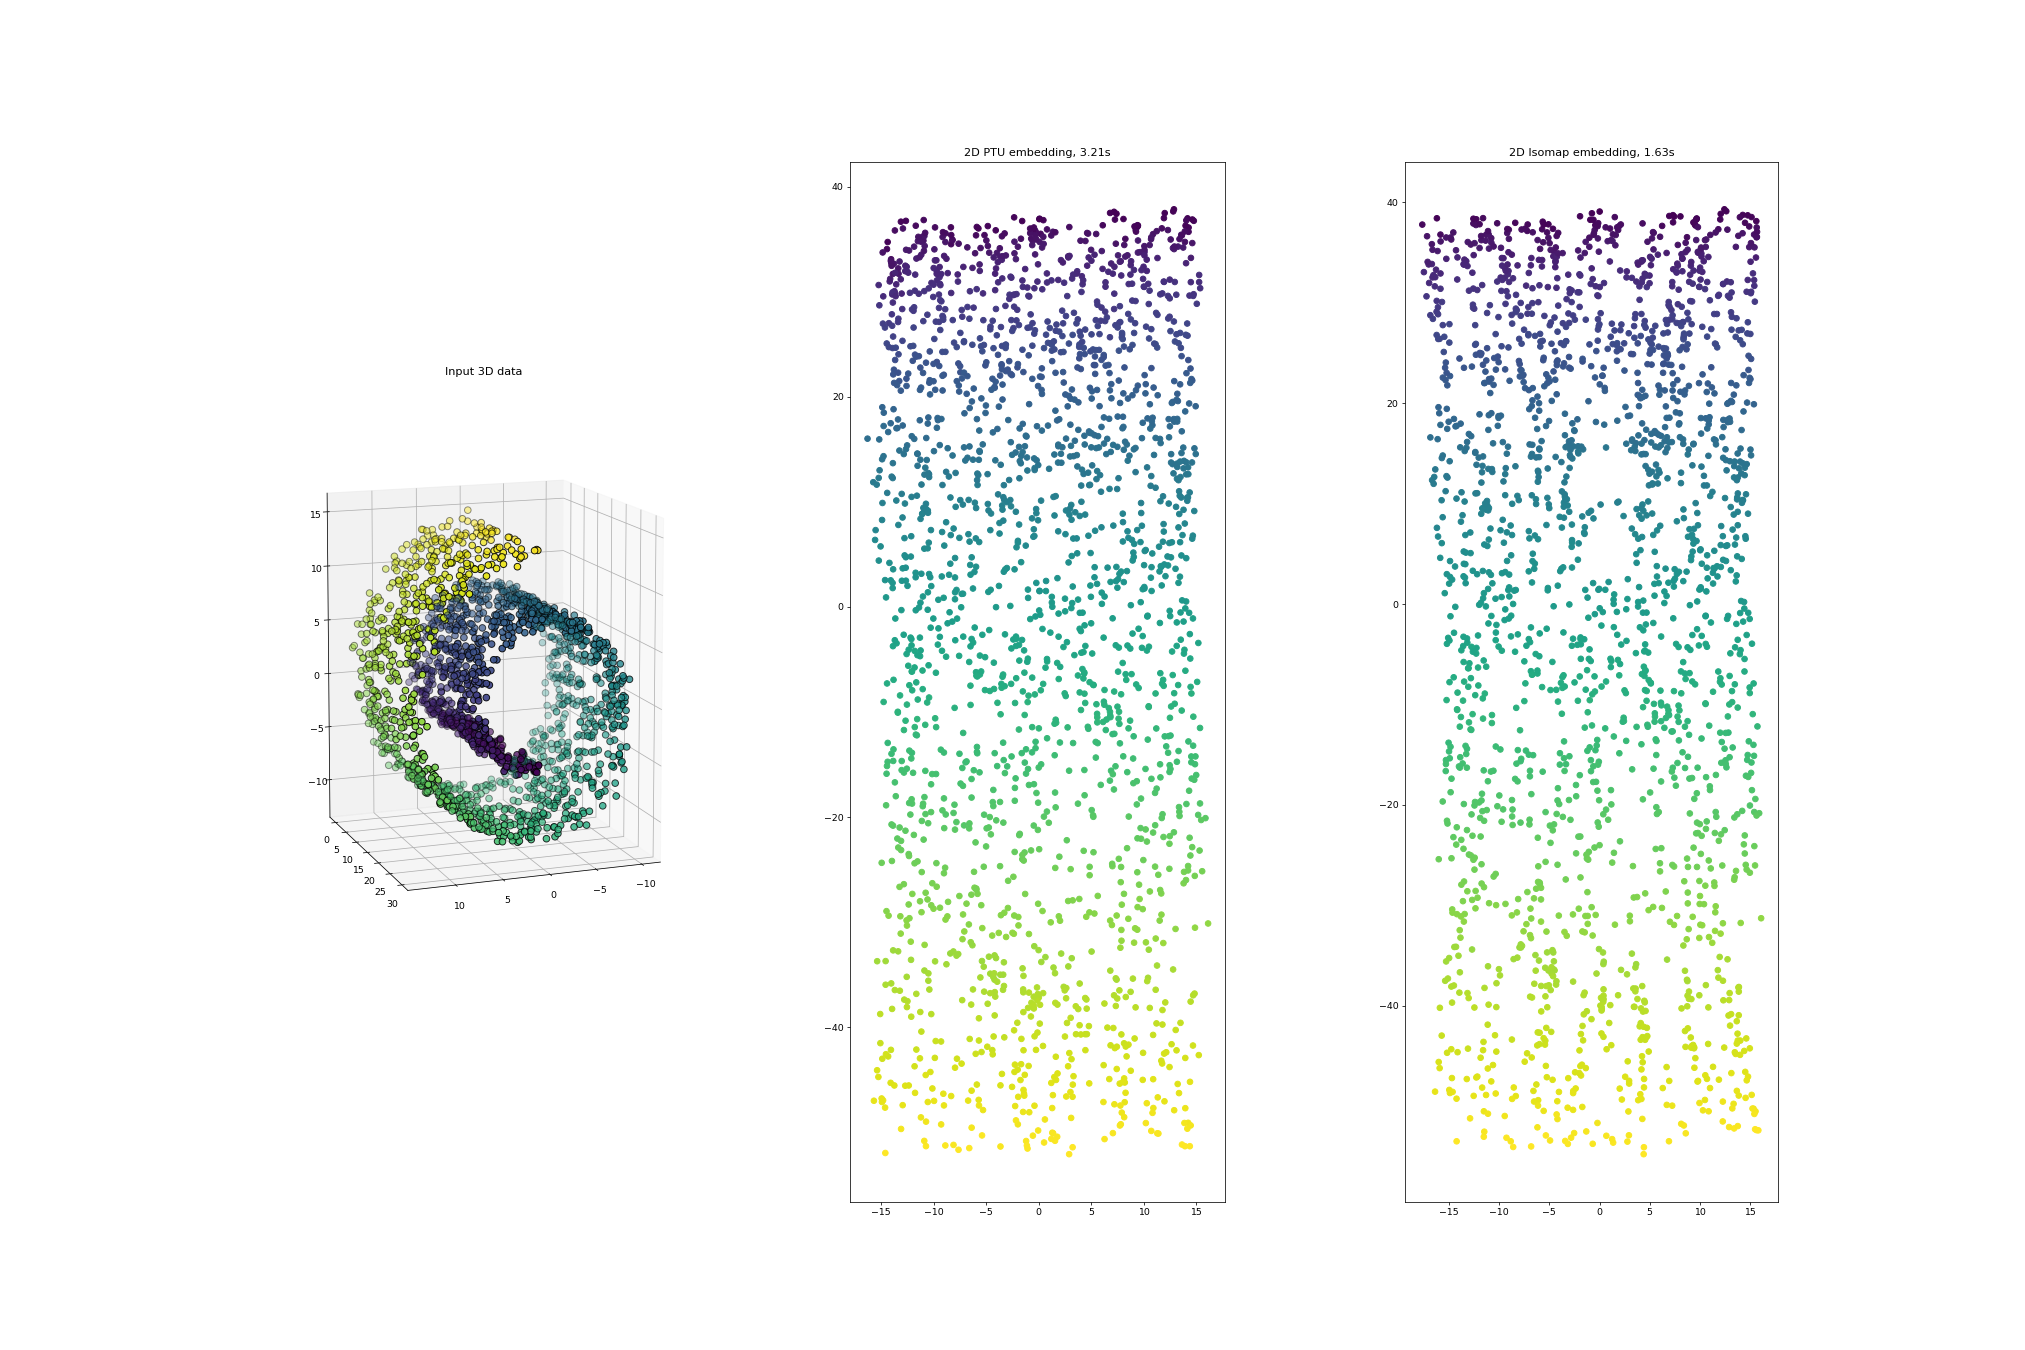

In [5]:
# Input 2D manifold embedded in 3D
with open(data_abs_path('./data/noisySwiss/noisySwiss.npy'), 'rb') as f:
    X = np.load(f)
print('Input pointset shape: ', X.shape)

# Non-isometric 2D parametrization of swiss roll. Useful for colormap.
with open(
        data_abs_path('./data/noisySwiss/noisySwiss_2D_nonisometric.npy'),
        'rb') as f:
    p = np.load(f)

# Perform PTU
t = time()
ptu = PTU(
    X=X,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
).fit()
ptu_time = round(time()-t, 2)
print('ptu time: ', ptu_time)

# Perform Isomap
t = time()
iso = Isomap(n_neighbors=10, n_components=2).fit_transform(X)
isomap_time = round(time()-t, 2)
print('isomap time: ', isomap_time)

# Align PTU and Isomap for better visual comparison
iso = align(iso, ptu)

# Plot results
f = plot_swiss(X, ptu, iso, ptu_time, isomap_time, colors=p[:, 0])
plt.show()


# Torus: standard filled 3D torus manifold embedded in 3D

[2020-08-09 10:35:59,416] INFO: ptu - Constructing proximity graph on 3044 points in 3D
[2020-08-09 10:35:59,438] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:35:59,439] INFO: ptu - Computing pairwise parallel transport distances


Input pointset shape:  (3044, 3)


[2020-08-09 10:36:13,272] INFO: ptu - Computing pairwise parallel transport distances: done
[2020-08-09 10:36:13,280] INFO: ptu - Performing MultiDimensional Scaling on 3044x3044 matrix
[2020-08-09 10:36:13,540] INFO: ptu - Performing MultiDimensional Scaling: done


ptu time:  14.16
isomap time:  4.23
ptu relative error: 5.124347833401118e-06%
isomap relative error: 41.931462062876165%


<IPython.core.display.Javascript object>


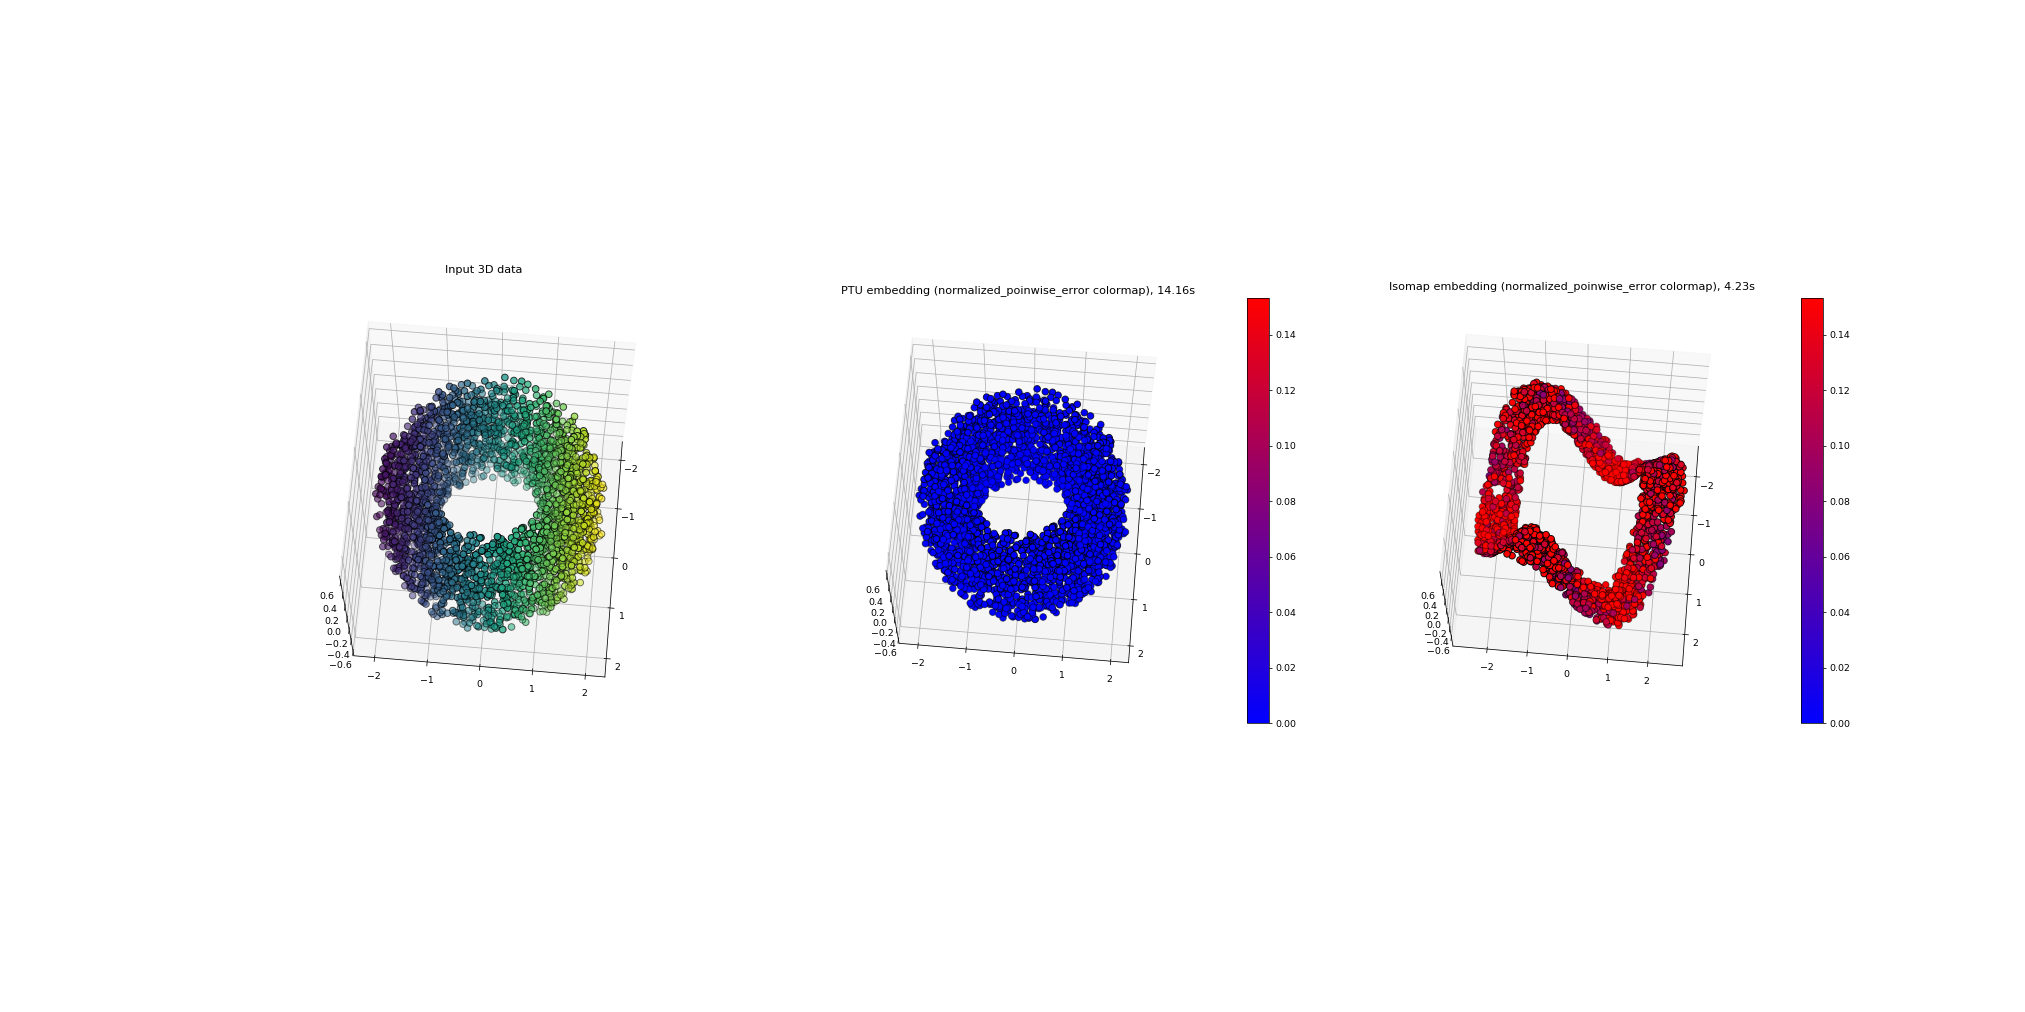

In [6]:
# Input 3D manifold embedded in 3D
with open(data_abs_path('./data/torus/torus.npy'), 'rb') as f:
    exact = np.load(f)
print('Input pointset shape: ', exact.shape)

# Perform PTU
t = time()
ptu = PTU(
    X=exact,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=3,
    verbose=True
).fit()
ptu_time = round(time()-t, 2)
print('ptu time: ', ptu_time)

# Perform Isomap
t = time()
iso = Isomap(n_neighbors=10, n_components=3).fit_transform(exact)
isomap_time = round(time()-t, 2)
print('isomap time: ', isomap_time)

# Align PTU and Isomap to exact parametrization via best isometric
# transformation, and compute errors
ptu = align(ptu, exact)
iso = align(iso, exact)
ptu_error = relative_error(ptu, exact)
iso_error = relative_error(iso, exact)
print('ptu relative error: {}%'.format(ptu_error))
print('isomap relative error: {}%'.format(iso_error))

# Plot results
f = plot_torus(exact, ptu, iso, ptu_time, isomap_time,
               hue='normalized_poinwise_error')
plt.show()

# Petals: 4 petals sampled from a surface of a sphere (2D manifold) isometrically embedded in 100D space.

[2020-08-09 10:36:17,959] INFO: ptu - Constructing proximity graph on 1629 points in 100D


Input pointset shape:  (1629, 100)


[2020-08-09 10:36:18,070] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:36:18,071] INFO: ptu - Computing pairwise parallel transport distances
[2020-08-09 10:36:27,668] INFO: ptu - Computing pairwise parallel transport distances: done
[2020-08-09 10:36:27,672] INFO: ptu - Performing MultiDimensional Scaling on 1629x1629 matrix
[2020-08-09 10:36:27,763] INFO: ptu - Performing MultiDimensional Scaling: done


ptu time:  9.81
isomap time:  1.17


<IPython.core.display.Javascript object>


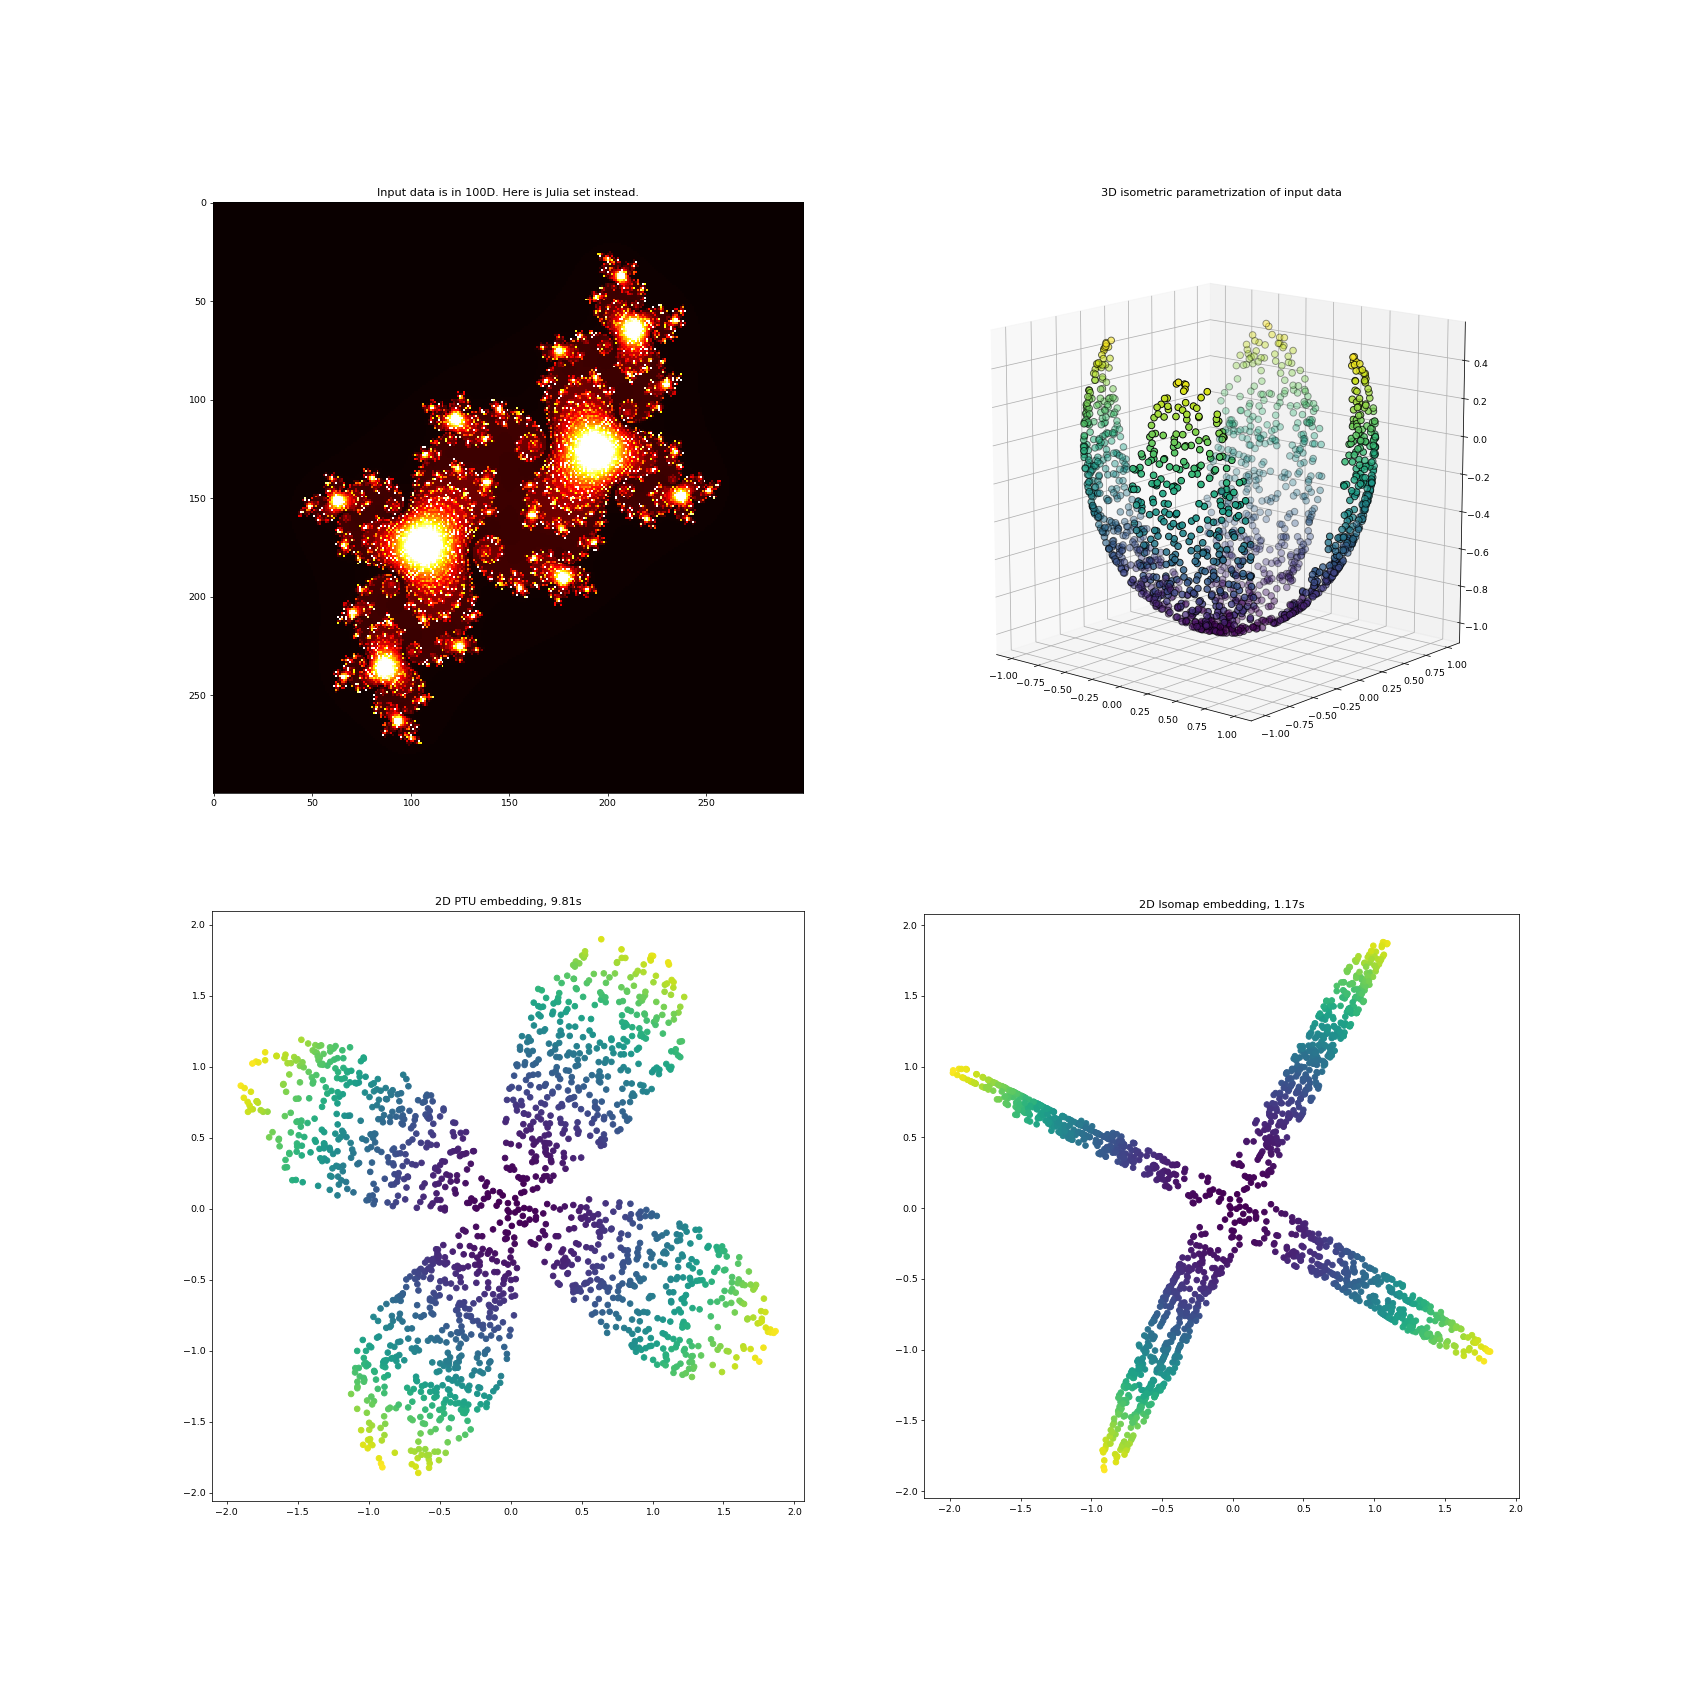

In [7]:
# Input manifold embedded in 3D, and exact 2D parametrization
with open(data_abs_path('./data/petals/petals_100D.npy'), 'rb') as f:
    X_100D = np.load(f)
with open(data_abs_path('./data/petals/petals_3D.npy'), 'rb') as f:
    X_3D = np.load(f)
print('Input pointset shape: ', X_100D.shape)

# Perform PTU
t = time()
ptu = PTU(
    X=X_100D,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
).fit()
ptu_time = round(time()-t, 2)
print('ptu time: ', ptu_time)

# Perform Isomap
t = time()
iso = Isomap(n_neighbors=10, n_components=2).fit_transform(X_100D)
isomap_time = round(time()-t, 2)
print('isomap time: ', isomap_time)
iso = align(iso, ptu)

# Plot results
f = plot_petals(X_3D, ptu, iso, ptu_time, isomap_time)
plt.show()


# Dijkstra vs PTU geodesic distances on a well sampledspherical cap with kNN and a Delaunay tringulation connectivity.

In [8]:
import scipy.sparse
from sklearn.neighbors import NearestNeighbors
from sklearn.utils.graph_shortest_path import graph_shortest_path

def special_geodesic_distance(x, y):
    return np.arctan2(np.linalg.norm(np.cross(x, y)), np.dot(x, y))


def spherical_geodesic_dists(X):
    N = X.shape[0]
    dists = np.zeros(shape=(N, N))
    for i in range(0, N):
        for j in range(i+1, N):
            dists[i, j] = special_geodesic_distance(X[i, :], X[j, :])
    dists += dists.T
    return dists


# Input spherical cap pointset
with open(data_abs_path('./data/sphericalCap/sphericalCap.npy'), 'rb') as f:
    X = np.load(f)
print('Input pointset shape: ', X.shape)

# Input triangulation connectivity
T = scipy.sparse.csc_matrix(
        scipy.sparse.load_npz(
            data_abs_path('./data/sphericalCap/triangulation_connectivity.npz')
        )
)

# Computing true geodesic distances on unit sphere
print('Computing true geodesic dists')
true_geod_dists = spherical_geodesic_dists(X)
print('Computing true geodesic dists: done')

# Computing PTU distances
print('Computing PTU dists')
ptu = PTU(
    X=X,
    n_neighbors=10,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
)
ptu.compute_geodesic_distances()
ptu_dists = ptu.ptu_dists
print('Computing PTU dists: done')

# Computing Dijkstra distances
print('Computing Dijkstra dists')
nn = NearestNeighbors(n_neighbors=10)
nn.fit(X)
graph = nn.kneighbors_graph(mode='distance')
dijkstra_dists = graph_shortest_path(graph, directed=False, method='D')
print('Computing Dijkstra dists: done')

ptu_relative_error = relative_error(ptu_dists, true_geod_dists)
dijkstra_relative_error = relative_error(dijkstra_dists, true_geod_dists)
print('PTU geodesic distances relative error (knn connectivity) = {}%'
      .format(ptu_relative_error))
print('Dijkstra geodesic distances relative error (knn connectivity) = {}%'
      .format(dijkstra_relative_error))

# Computing PTU distances with triangulation connectivity
print('Computing PTU dists with triangulation connectivity')
ptu = PTU.with_custom_graph(
    X=X,
    graph=T,
    geod_n_neighbors=10,
    embedding_dim=2,
    verbose=True
)
ptu.compute_geodesic_distances()
ptu_dists = ptu.ptu_dists
print('Computing PTU dists with triangulation connectivity: done')

# Computing Dijkstra distances with triangulation connectivity
print('Computing Dijkstra dists with triangulation connectivity')
graph = T
dijkstra_dists = graph_shortest_path(graph, directed=False, method='D')
print('Computing Dijkstra dists with triangulation connectivity: done')

ptu_relative_error = relative_error(ptu_dists, true_geod_dists)
dijkstra_relative_error = relative_error(dijkstra_dists, true_geod_dists)
print('PTU geodesic distances relative error (triang. connectivity) = {}%'
      .format(ptu_relative_error))
print('Dijkstra geodesic distances relative error (triang. connectivity)',
      ' = {}%'
      .format(dijkstra_relative_error))


Input pointset shape:  (696, 3)
Computing true geodesic dists


[2020-08-09 10:36:39,509] INFO: ptu - Constructing proximity graph on 696 points in 3D
[2020-08-09 10:36:39,512] INFO: ptu - Constructing proximity graph: done
[2020-08-09 10:36:39,512] INFO: ptu - Computing pairwise parallel transport distances


Computing true geodesic dists: done
Computing PTU dists


[2020-08-09 10:36:39,859] INFO: ptu - Computing pairwise parallel transport distances: done


Computing PTU dists: done
Computing Dijkstra dists
Computing Dijkstra dists: done


[2020-08-09 10:36:40,051] INFO: ptu - Using provided proximity graph
[2020-08-09 10:36:40,051] INFO: ptu - Computing pairwise parallel transport distances


PTU geodesic distances relative error (knn connectivity) = 0.04368452331466141%
Dijkstra geodesic distances relative error (knn connectivity) = 1.9916481174502312%
Computing PTU dists with triangulation connectivity


[2020-08-09 10:36:40,411] INFO: ptu - Computing pairwise parallel transport distances: done


Computing PTU dists with triangulation connectivity: done
Computing Dijkstra dists with triangulation connectivity
Computing Dijkstra dists with triangulation connectivity: done
PTU geodesic distances relative error (triang. connectivity) = 0.10961610190995984%
Dijkstra geodesic distances relative error (triang. connectivity)  = 5.420829194756689%
